In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image
import cv2

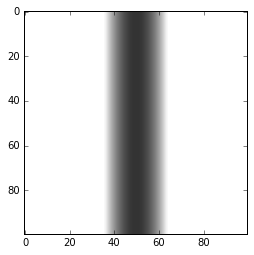

In [2]:
y, x = np.ogrid[-5:5:100j, -5:5:100j]
plt.imshow(x * x + (y - y), cmap=cm.gray, vmin=-.5, vmax=2)

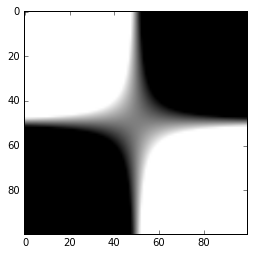

In [3]:
plt.imshow(x * y, cmap=cm.gray, vmin=-1, vmax=1)

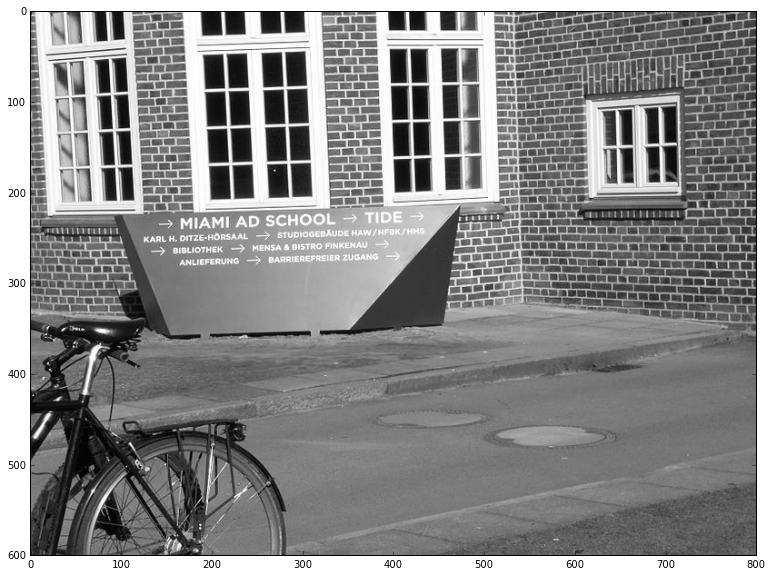

In [4]:
finkenau = np.array(Image.open("finkenau.jpg").convert("L"))
fig = plt.figure()
fig.set_size_inches((13, 13))
plt.imshow(finkenau, cmap=cm.gray)

In [5]:
from skimage.feature import corner_harris, corner_peaks

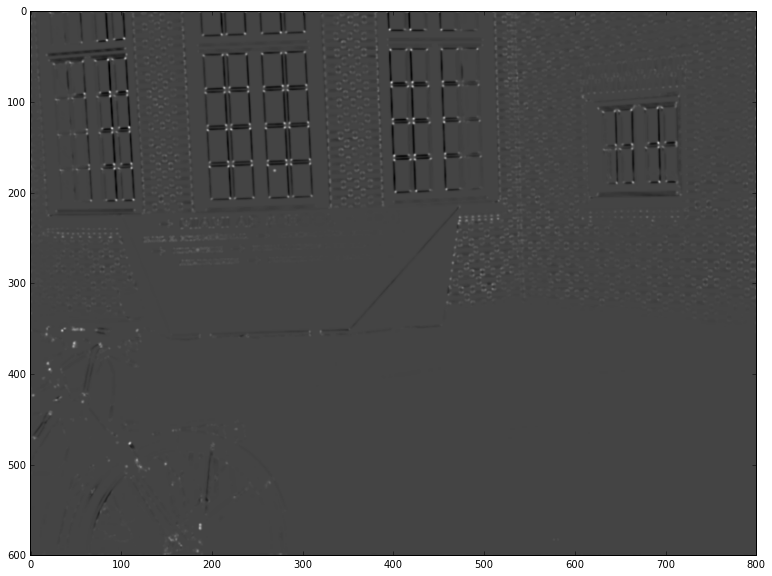

In [6]:
fig = plt.figure()
fig.set_size_inches((13, 13))
plt.imshow(corner_harris(finkenau), cmap=cm.gray)

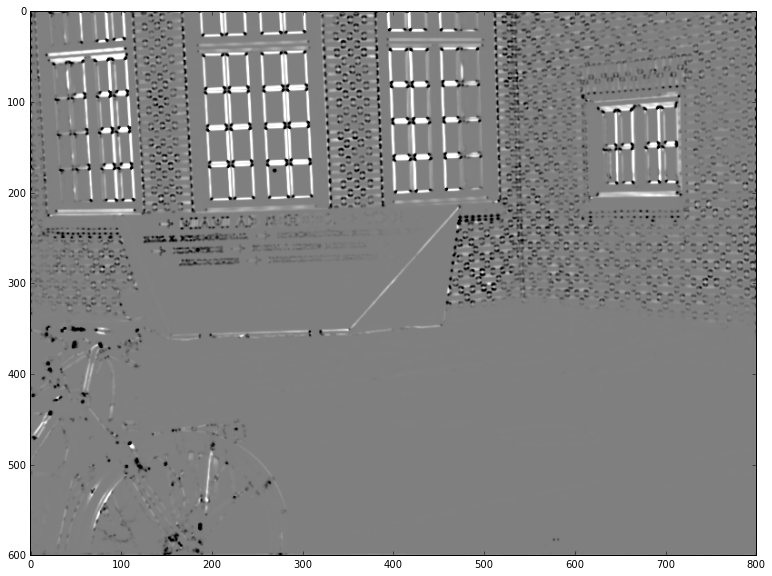

In [7]:
fig = plt.figure()
fig.set_size_inches((13, 13))
plt.imshow(corner_harris(finkenau), cmap=cm.gray_r, vmin=-1, vmax=1)

In [8]:
corners = corner_peaks(corner_harris(finkenau))
corners[:5]

array([[ 12, 609],
       [ 16, 511],
       [ 21, 168],
       [ 21, 395],
       [ 21, 418]], dtype=int64)

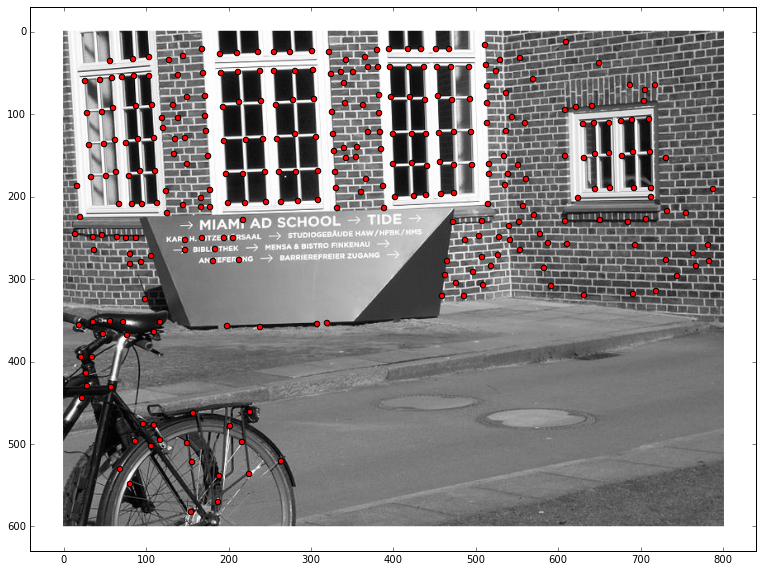

In [9]:
yCorners, xCorners = list(zip(*corners))

fig = plt.figure()
fig.set_size_inches((13, 13))
plt.imshow(finkenau, cmap=cm.gray)
plt.scatter(xCorners, yCorners, c='r', s=30)

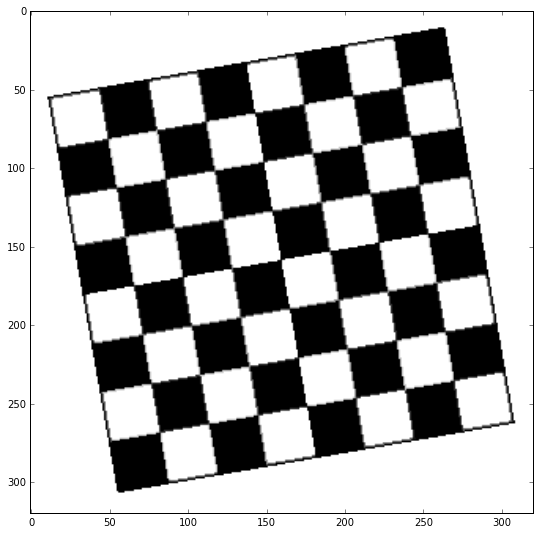

In [10]:
chess = np.array(Image.open("chess.png").convert("L"))
fig = plt.figure()
fig.set_size_inches((9, 9))
plt.imshow(chess, cmap=cm.gray)

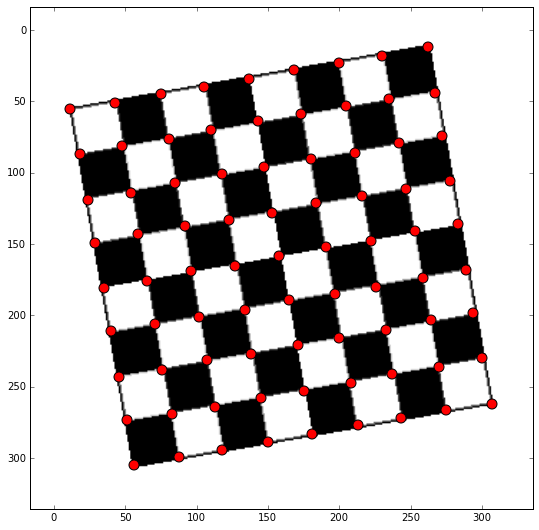

In [12]:
fig = plt.figure()
fig.set_size_inches((9, 9))
plt.imshow(chess, cmap=cm.gray)
yCorners, xCorners = list(zip(*corner_peaks(corner_harris(chess))))
plt.scatter(xCorners, yCorners, c='r', s=100)

In [13]:
sift = cv2.xfeatures2d.SIFT_create()

In [14]:
kp = sift.detect(finkenau, None)

In [15]:
kp[:5]

[<KeyPoint 0000004EFE678E40>,
 <KeyPoint 0000004EFE678F90>,
 <KeyPoint 0000004E81D071B0>,
 <KeyPoint 0000004E81D07210>,
 <KeyPoint 0000004E81D070F0>]

In [16]:
kp0 = kp[0]

In [17]:
kp0.pt

(700.1821899414062, 2.319504499435425)

In [18]:
kp0.octave

2949631

In [19]:
kp0.size

1.8712478876113892

In [20]:
kp0.angle

264.1690673828125

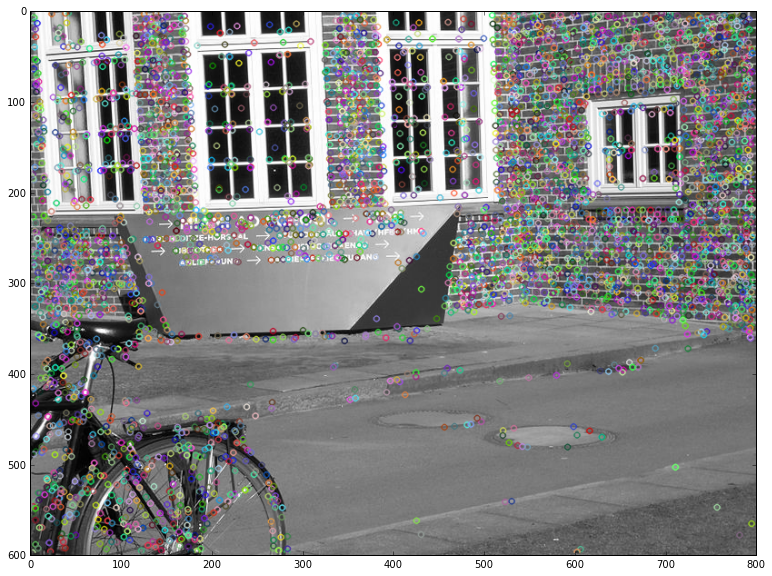

In [21]:
fig = plt.figure()
fig.set_size_inches((13, 13))
plt.imshow(cv2.drawKeypoints(finkenau, kp, None))

In [22]:
kp, descr = sift.compute(finkenau, kp)

In [23]:
descr[0]

array([  55.,    6.,    0.,    0.,    0.,    1.,    1.,   21.,  152.,
         19.,    3.,    9.,   35.,    3.,    0.,    8.,   23.,    3.,
          3.,   44.,  152.,   25.,    0.,    1.,    0.,    0.,    0.,
          5.,   21.,    4.,    0.,    0.,   59.,    3.,    0.,    0.,
          2.,    2.,    8.,   11.,  152.,    5.,    1.,    2.,   24.,
         28.,    4.,   39.,   32.,    1.,    0.,    5.,  150.,  152.,
          5.,   12.,    0.,    0.,    0.,    0.,    6.,   19.,    0.,
          0.,   50.,    1.,    0.,    1.,    3.,    1.,   11.,   20.,
        152.,   26.,    1.,   12.,   16.,    5.,    2.,   21.,   49.,
         11.,    2.,   83.,  127.,   45.,    1.,    3.,    0.,    0.,
          0.,    5.,    4.,    4.,    0.,    0.,   14.,    1.,    1.,
          0.,    1.,    3.,  114.,   42.,  149.,    3.,    0.,    3.,
         35.,    3.,   29.,  103.,   22.,    1.,    0.,   24.,  152.,
          3.,    0.,    8.,    0.,    0.,    0.,    1.,    3.,    0.,
          0.,    0.]

In [24]:
descr[0].shape

(128,)

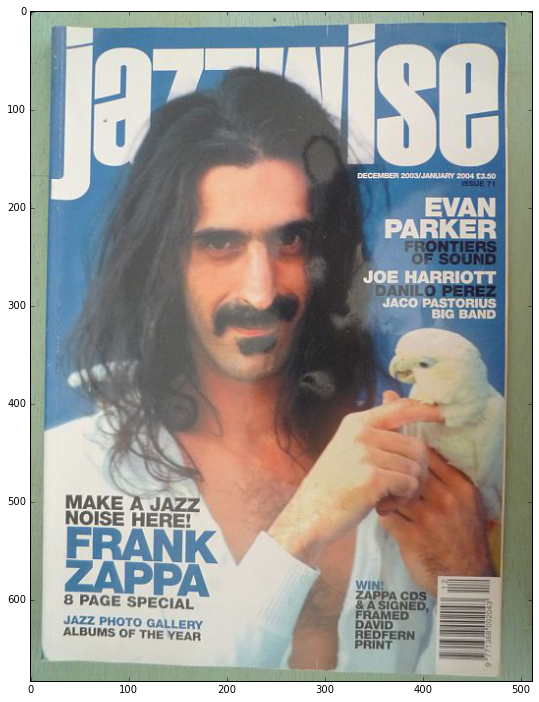

In [25]:
detail = np.array(Image.open("detail.jpg"))

fig = plt.figure()
fig.set_size_inches((12, 12))
plt.imshow(detail)

In [26]:
kp1, descr1 = sift.detectAndCompute(detail, None)

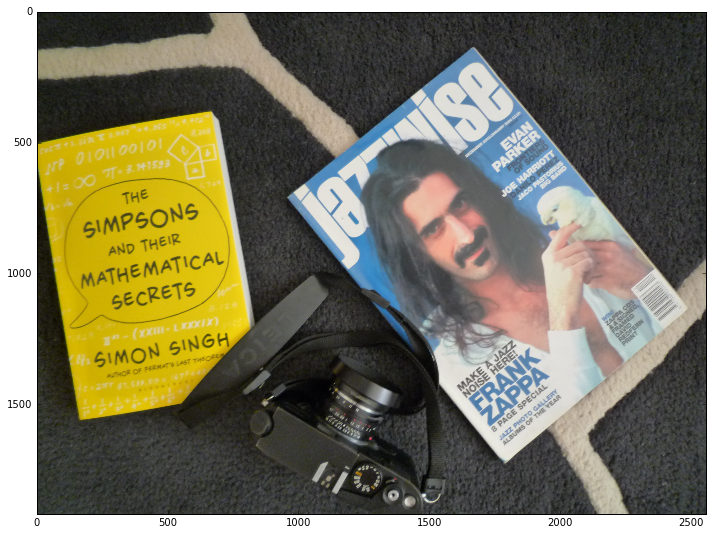

In [27]:
all = np.array(Image.open("all.jpg"))

fig = plt.figure()
fig.set_size_inches((12, 12))
plt.imshow(all)

In [28]:
kp2, descr2 = sift.detectAndCompute(all, None)

In [29]:
bf = cv2.BFMatcher()

In [30]:
matches = bf.match(descr1, descr2)

In [31]:
matches[:3]

[<DMatch 0000004E842226F0>,
 <DMatch 0000004E8484E370>,
 <DMatch 0000004E8484E150>]

In [32]:
matches[0].distance

181.87083435058594

In [33]:
matches = sorted(matches, key = lambda m: m.distance)

In [34]:
len(matches)

1708

In [35]:
%run drawMatches.py

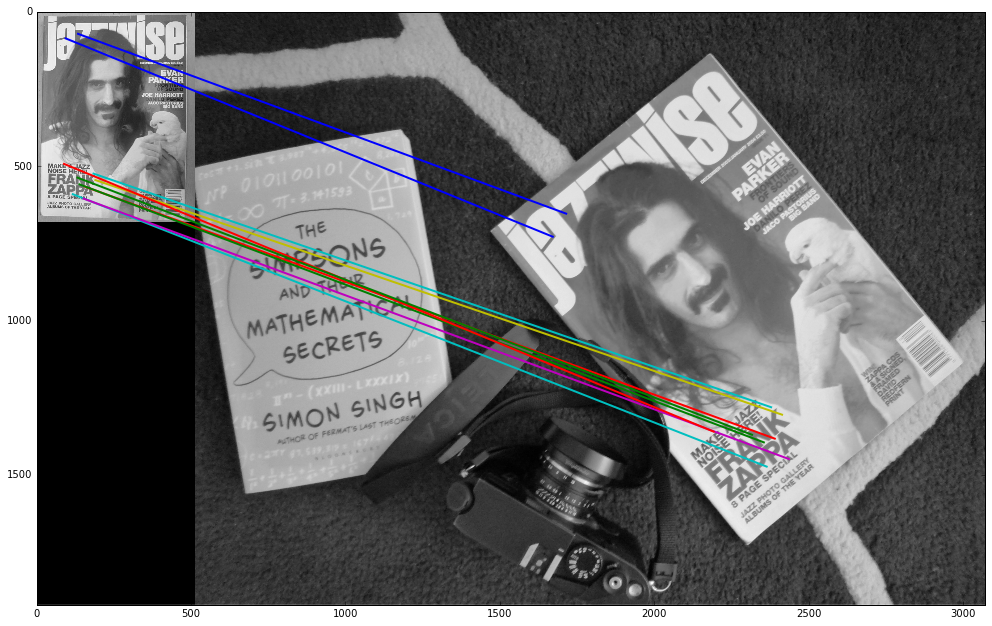

In [36]:
detailBW = np.array(Image.open("detail.jpg").convert("L"))
allBW = np.array(Image.open("all.jpg").convert("L"))
fig = plt.figure()
fig.set_size_inches((17, 17))
drawMatches(detailBW, kp1, allBW, kp2, matches[:10])